In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
from nltk.tokenize import word_tokenize
import nltk

%matplotlib inline

In [37]:
df = pd.read_csv('emails.csv',delimiter=',',encoding='latin-1')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


Text(0.5, 1.0, 'Number of ham and spam messages')

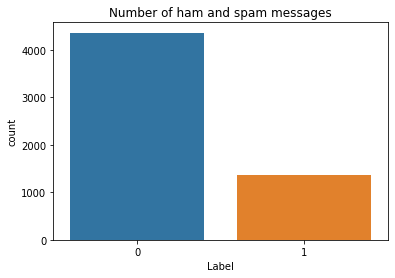

In [38]:
sns.countplot(df.spam)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [39]:
X = df.text
Y = df.spam
print(Y)
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y)
Y = Y.reshape(-1,1)

0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: spam, Length: 5728, dtype: int64
[1 1 1 ... 0 0 0]


#### แบ่งข้อมูลระหว่าง train กับ test โดยที่ test ให้มีจำนวนเป็น 20% จากทั้งหมด

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

#### ขั้นตอนถัดไป ตัว ML จะต้องแปลงตัวอักษรเป็นตัวเลข Classification ของ text จะต้องใช้ bag-of-word แปลเป็นไทยง่ายๆคือคลังคำศัพท์ 
#### หลักการทำงานของมันคือจะมีตัดคำ (Segmentation) [ถ้าภาษาอังกฤษก็จะตัดด้วย space bar] จากนั้นก็จะนับว่าคำๆนั้นปรากฏขึ้นทั้งหมดกี่ครั้งในแต่ละอีเมล 

#### ลบเครื่องหมายและดำเนินการปรับสภาพอักขระอื่น ๆ ในระหว่างขั้นตอนการประมวลผลล่วงหน้า ‘ascii’ เป็นวิธีที่รวดเร็วที่ใช้ได้กับอักขระที่มีการทำ ASCII โดยตรงเท่านั้น ‘unicode’ เป็นวิธีที่ช้ากว่าเล็กน้อย ปรับให้เป็นตัวเล็ก และตัด stop_word ของภาษาอังกฤษออก เช่น the , and

#### ที่เราไม่ใช้ fit_transform ใน X_test เพราะมันจะทำให้ขนาดเมตริกมีขนาดเล็กลงเพราะมันจะทำให้เอาคำศัพท์ที่มีในแค่ของตัว X_test

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(strip_accents='ascii', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train) 
#ใช้ fit transform จะแปลงจาก list textทั้งหมด ให้อยู่ในรูปแบบของการนับคำ ว่าแต่ละคำมีจำนวนเท่าไหร่ และอยู่ตำแหน่งไหนของคำทั้งหมด
#คือจะเอาทั้งหมดที่มีในอีเมล มาเป็นตัวกำหนดขนาด
#ถ้า fit ข้อมูลกับ X_train จะทำให้มีจำนวนคำที่มาก เพราะเป็นข้อมูลขนาดใหญ่กว่าตัว X_test 
#และเมื่อใช้คำสั่ง fit ตัวแปล cv จะเก็บขนาดของจำนวนคำเอาไว้ 

X_test_cv = cv.transform(X_test) #X_test ใช้คำสั่ง transform เพราะ ให้มีขนาดของจำนวนคำให้เหมือน X_train


#### X_test_cv = cv.fit.transform(X_test) ไม่ใช้อันนี้เพราเพระมันจะ fit ตามขนาดของคำที่มีใน X_test  มันก็จะไม่ครบ

In [42]:
X_train_cv.shape #จำนวนอีเมลของ X_train ,มีคำที่ไม่ซ้ำกันทั้งหมด 33236

(4582, 33252)

In [43]:
X_test_cv.shape #จำนวนอีเมลของ X_test , ถูกปรับให้มีขนาด 33236 เหมือน X_train เพราะ ตัวแปร cv มันจำขนาด 33236 ไว้

(1146, 33252)

#### แสดงข้อมูลที่เราได้ทำการเปลี่ยน

In [44]:
X_train_cv.toarray() 
#ตัวเทรนจะใช้ข้อมูลของมันเองมาใช้ในการช่วยนับในอาร์เรย์จะมีบอกว่าคำแต่ละคำมีจำนวนเท่าไหร่ คำแต่ละคำจะถูกแทนด้วยตำแหน่งใน list ของแต่ละอีเมล

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
X_test_cv.toarray() #ใช้ข้อมูลจากตัวเทราน ดังนั้นคำที่อยู่ในตัวเทรน ตัวเทสจะไม่ค่อยมี   

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [2, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

[cat,dog,bug,cat]

[bird,cat,dug]

[bird,cat]

[cat,dog,bug,bird,dug]

[2,1,1,0,0]

[1,0,0,1,1]

[1,0,0,1,0]

#### Naive Bayes แบบ Multinomial เหมาะสำหรับการจำแนกประเภทที่มีคุณสมบัติแยก (เช่นการนับจำนวนคำสำหรับการจำแนกข้อความ) การแจกแจงข้อมูลปกติต้องมีคุณสมบัติจำนวนเต็มคือลักษณะของ Naive Bayes แบบ Multinomial  แต่สามารถใช้แบบอื่นได้ แต่ไม่ดีเท่าตัวนี้

In [46]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, Y_train) #สั่งให้มันรัน ฝึกข้อมูล มันจะได้ค่าprobของเหตุการณ์แต่ละคำที่เป็นspam/ham เก็บไว้ในชุดของspam/ham
predictions = naive_bayes.predict(X_test_cv) #เอาข้อมูลมาทำนายว่าจะเป็นspam หรือ ham


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
predictions #ผลลัพธ์การทำนายของข้อมูลชุด test

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

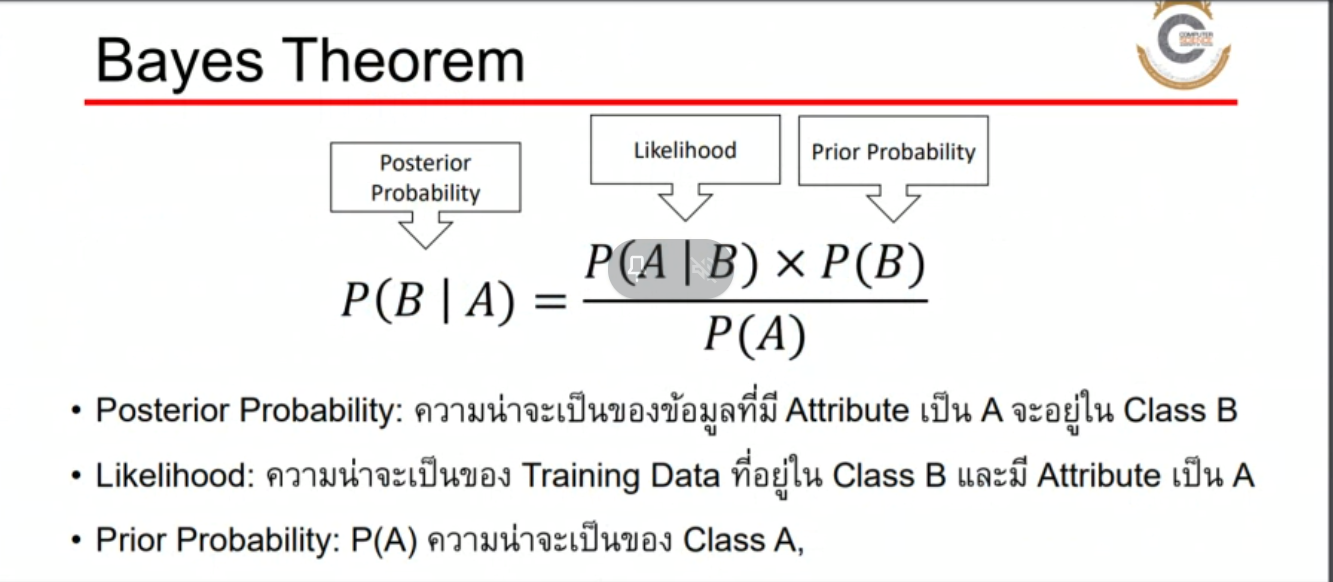

[cat,dog,bug,cat] spam

[bird,cat,dug] ham

[bird,cat] spam

[cat,dog,bug,bird,dug]

[2,1,1,0,0]

[1,0,0,1,1]

[1,0,0,1,0]

#### หาความน่าเป็นที่คำนั้นจะเป็น ham หรือ spam

 P(spam | cat) = P(cat | spam) * P(spam) / P(cat) 
 
 P(cat | spam) = 3 / 6 = 0.5
 
 P(cat) = 4 / 9 = 0.444
 
 P(spam) = 6 / 9 = 0.666
 
 P(spam | cat) = 0.5 * 0.666 / 0.444
 
 = 0.75

#### หาค่าความน่าจะเป็นรวมจะทำการแบ่งเป็นสองอย่างคือ คิดผลรวมของการเป็น sam//ham ผลรวมนี้เกิดจากกการคูณกัน

[cat,dog,bug,cat] spam

[bird,cat,dug] ham

[bird,cat] spam



[P(spam | cat),P(spam | dog),P(spam | bug),P(spam | bird),P(spam | dug)] spam

[P(ham | cat),P(ham | dogl),P(ham | bug),P(ham | bird),P(ham | dug)] ham

[2,1,1,0,0] = 0.75 * 0.75 * x * y ส่วนตัวที่เป็น 0 จะไม่เอามาคิด หลังจากนั้นทำการคิดของฝั่ง ham และนำมาเทียบกันและเลือกตอบ

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy score: ', accuracy_score(Y_test, predictions)) #ค่าความแม่นยำ(ผลเฉลยที่แท้จริง,ผลลัพธ์ในการทำนาย)

Accuracy score:  0.9947643979057592


In [49]:
predictions

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [50]:
len(predictions)

1146

In [51]:
cm = confusion_matrix(Y_test, np.round(predictions)) #ฟังชั่น confusion_matrix แปลงให้กลายเป็นเมตริก เพื่อให้เห็นผลลัพธ์

In [52]:
print('CONFUSION MATRIX ------------------')
print(cm)

CONFUSION MATRIX ------------------
[[854   4]
 [  2 286]]


#### ในส่วนของ ham ตอบถูกไป 854 ใน 856

#### ในส่วนของ spam ตอบถูกไป 286 ใน 290